In [ ]:
%pip install fashion-clip
%pip install faiss-cpu

In [ ]:
from PIL import Image

# Define the size of the image (width, height) in pixels
width = 2048
height = 3072

# Create a new image with white background
image = Image.new("RGB", (width, height), "red")

# Save the image to a file
image.save("images/red.jpg")

In [ ]:
from fashion_clip.fashion_clip import FashionCLIP
import os
import numpy as np
fclip = FashionCLIP('fashion-clip')

image_names = ["images/red.jpg"] + ["/mnt/c/Users/pablo/Desktop/hack/images/" + str(n) + ".jpg" for n in range(1000) if os.path.exists("/mnt/c/Users/pablo/Desktop/hack/images/" + str(n) + ".jpg")]

# we create image embeddings and text embeddings
image_embeddings = fclip.encode_images(image_names, batch_size=32)
image_embeddings = image_embeddings/np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)

In [ ]:
print(image_embeddings.shape)

In [55]:
import faiss

# we create an index
index = faiss.IndexFlatL2(image_embeddings.shape[1])
index.add(image_embeddings)

# we search for the nearest neighbors of the third image
D, I = index.search(image_embeddings[9:10], 5)

print(I)

[[  9 667   1 355 730]]


In [52]:
image_embeddings[:1]

array([[ 2.45662369e-02,  2.62622442e-02, -4.48974632e-02,
        -3.87500264e-02, -7.66295148e-03,  1.79624129e-02,
        -2.95880232e-02,  1.75335314e-02, -2.49209199e-02,
         1.16611794e-02, -3.94308567e-03, -3.87607655e-03,
        -1.07503040e-02, -3.36121558e-03, -4.86477278e-03,
        -2.62388345e-02,  8.62279534e-02, -5.32339793e-03,
         2.13093013e-02, -5.41737378e-02,  1.64111890e-02,
         2.97411782e-04,  5.02915634e-03,  9.94354486e-03,
        -1.78984106e-02,  4.12697846e-04, -5.89211751e-03,
        -5.36561757e-03, -9.30280983e-03, -8.83247517e-03,
         1.03015909e-02, -5.01048611e-03,  7.69696524e-03,
        -1.72799379e-02, -1.23396525e-02,  1.19722728e-02,
        -7.25545688e-04, -2.36687399e-02,  4.92582954e-02,
         1.87001377e-02,  3.99011709e-02,  1.24030514e-02,
        -7.05076521e-03,  1.01720877e-02,  8.78361985e-03,
         2.01874487e-02,  1.38909062e-02, -1.00192204e-02,
        -1.30000031e-02, -4.17235494e-02,  4.13735444e-0

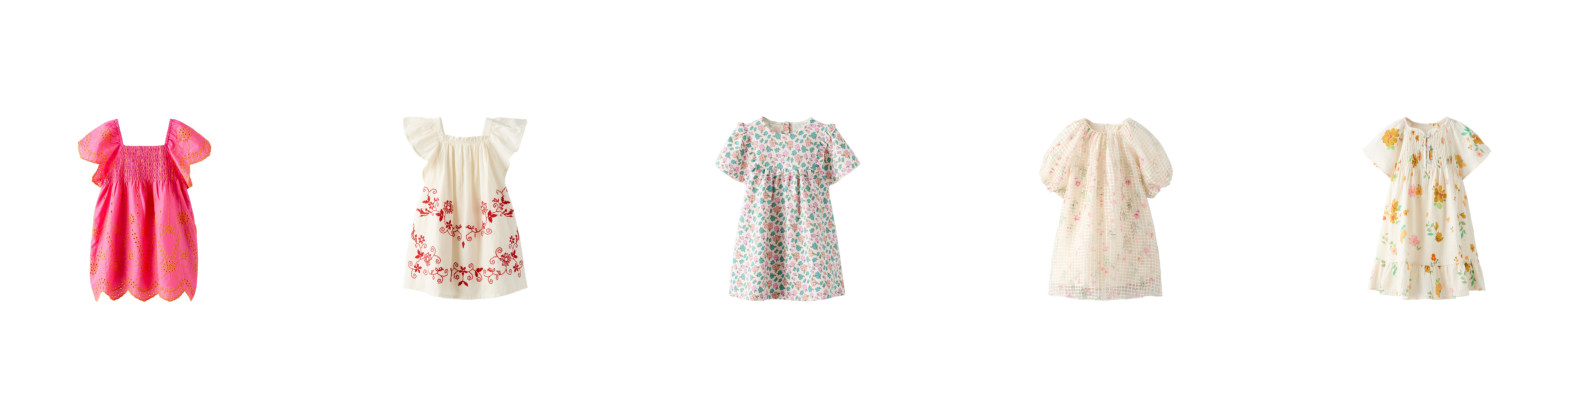

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()